In [1]:
import os
import pandas as pd
#import mcdm
import numpy as np
from itertools import combinations, permutations, product
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib.pyplot import gcf
#from matplotlib.patches import Patch
from matplotlib.lines import Line2D
#from matplotlib.pyplot import gca
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import scipy.stats as stats
from typing import Any, Iterable, Optional

In [2]:
path = "/home/ec2-user/studies/GRAIMatter/experiments/old_results"
file_names = [file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file)) and 'corrected' in file]
results_df = pd.DataFrame()
for f in file_names:
    print(f)
    results_df = pd.concat([results_df, pd.read_csv(os.path.join(path, f), index_col=0)], ignore_index=True)
print(results_df.target_classifier.unique())

results_df['dataset'].replace('minmax in-hospital-mortality', 'in-hospital-mortality', inplace=True)
results_df['dataset'].replace('minmax mimic2-iaccd', 'mimic2-iaccd', inplace=True)
results_df['dataset'].replace('minmax texas hospitals 10', 'texas hospitals 10', inplace=True)
results_df['dataset'].replace('minmax indian liver', 'indian liver', inplace=True)
results_df['dataset'].replace('minmax synth-ae', 'synth-ae', inplace=True)


results_df['overfitting'] = abs(results_df.target_train_ACC - results_df.target_ACC)
results_df['overfitting AUC'] = abs(results_df.target_train_AUC - results_df.target_AUC)

total = len(results_df)

AdaBoost_results_corrected.csv
DecisionTreeClassifier_results_corrected.csv
RandomForest_results_corrected.csv
SVC_linear_results_corrected.csv
SVC_rbf_dp_results_corrected.csv
logreg_results_corrected.csv
xgboost_indianliver_results_corrected.csv
xgboost_inhospitalmortality_results_corrected.csv
xgboost_mimic_results_corrected.csv
xgboost_synthae_results_corrected.csv
xgboost_texashospital_results_corrected.csv
['AdaBoostClassifier' 'DecisionTreeClassifier' 'RandomForestClassifier'
 'SVC' 'DPSVC' 'LogisticRegression' 'XGBClassifier']


In [3]:
def binarise(x:Iterable[float],
             threshold:float,
             inverse:Optional[bool]=False):
    '''
    Return binary values of the list/pandas series.
    0 refers to 'safe' values
    1 refers to 'unsafe' values
    
    By default it assumes that values above the threshold are unsafe and
    are set to 1. When inverse is set to True are metrics where the dangerous
    values are low rather than high.
    
    x: list or series to binarise
    threshold: limit above which values
    inverse: unsafe values are above the threshold (False, default) 
             or below the threshold (True).
    '''
    if not inverse:
        return(np.where(x >= threshold, 1, 0))
    else:
        return(np.where(x > threshold, 0, 1))

In [4]:
metrics = ['mia_TPR',
        #'mia_FPR',
        'mia_TNR',
        'mia_PPV',
        'mia_NPV',
        #'mia_FNR',
        'mia_ACC',
        'mia_F1score',
        #'mia_FAR',
        'mia_Advantage',
        'mia_AUC modified'
           ]
results_df['mia_AUC modified'] = [abs(x-0.5)+0.5 for x in results_df.mia_AUC]

inverse_metrics = [#"mia_FPR", 
                   #"mia_FAR", 
                   "mia_TNR", 
                   #"mia_FNR"
                  ]

#according to paiwise plot of the metrics some metrics provide the same information,
#these are:
# TNR - FPR
# FNR - TPR
# FAR - PPV
#Therefore one metric of each pair can be discarded, and the discarded ones are:
# FPR
# FNR
# FAR

In [5]:
binary_metrics = results_df[metrics]

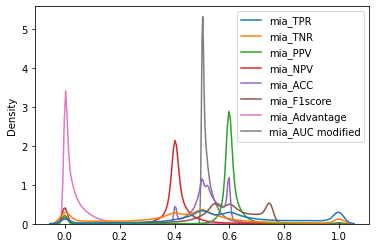

In [6]:
sns.kdeplot(data=binary_metrics)
plt.savefig("all_metrics_density_plot.png", bbox_inches='tight')

In [ ]:
print([i/100 for i in range(0,101,5)])

In [ ]:
limits = {}

m = {}
for metric in metrics:
    if metric in inverse_metrics:
        q75 = results_df[metric].quantile(0.25)
    else:
        q75 = results_df[metric].quantile(0.75)
    m[metric] = round(q75,2)
limits['quantile75'] = m

limits['q75 adjusted'] = {}
limits['q75 adjusted']['mia_TPR'] = 0.60
limits['q75 adjusted']['mia_FPR'] = 0.40
limits['q75 adjusted']['mia_TNR'] = 0.40
limits['q75 adjusted']['mia_PPV'] = 0.60
limits['q75 adjusted']['mia_NPV'] = 0.40
limits['q75 adjusted']['mia_FNR'] = 0.30
limits['q75 adjusted']['mia_ACC'] = 0.60
limits['q75 adjusted']['mia_F1score'] = 0.60
limits['q75 adjusted']['mia_FAR'] = 0.35
limits['q75 adjusted']['mia_Advantage'] = 0.05
limits['q75 adjusted']['mia_AUC modified'] = 0.55

limits['60-40 adjusted'] = {}
limits['60-40 adjusted']['mia_TPR'] = 0.60
limits['60-40 adjusted']['mia_FPR'] = 0.40
limits['60-40 adjusted']['mia_TNR'] = 0.40
limits['60-40 adjusted']['mia_PPV'] = 0.60
limits['60-40 adjusted']['mia_NPV'] = 0.40
limits['60-40 adjusted']['mia_FNR'] = 0.40
limits['60-40 adjusted']['mia_ACC'] = 0.60
limits['60-40 adjusted']['mia_F1score'] = 0.60
limits['60-40 adjusted']['mia_FAR'] = 0.40
limits['60-40 adjusted']['mia_Advantage'] = 0.05
limits['60-40 adjusted']['mia_AUC modified'] = 0.55

In [ ]:
results_df = ''
c = ''
del(results_df)
del(c)

In [ ]:
sns.pairplot(binary_metrics, kind="kde", corner=True)
plt.savefig("Pairwise_plot_metrics.png", bbox_inches='tight')

start
len comb  metrics 1
499950 total
bi           mia_TPR   mia_TNR   mia_PPV   mia_NPV   mia_ACC  mia_F1score  \
mia_TPR  0.192021  0.166267  0.003062  0.008353  0.003376     0.004844   

         mia_Advantage  mia_AUC modified  
mia_TPR       0.010785          0.003536  
              index     0
0           mia_TPR  0.85
1           mia_TNR  0.15
2           mia_PPV  0.85
3           mia_NPV  0.85
4           mia_ACC  0.85
5       mia_F1score  0.85
6     mia_Advantage  0.25
7  mia_AUC modified  0.85
bi           mia_TPR   mia_TNR   mia_PPV   mia_NPV   mia_ACC  mia_F1score  \
mia_TPR  0.260034  0.222442  0.007407  0.012635  0.007991     0.029127   

         mia_Advantage  mia_AUC modified  
mia_TPR       0.018482          0.007869  
              index     0
0           mia_TPR  0.75
1           mia_TNR  0.25
2           mia_PPV  0.75
3           mia_NPV  0.75
4           mia_ACC  0.75
5       mia_F1score  0.75
6     mia_Advantage  0.20
7  mia_AUC modified  0.75
bi          mia_T

<Figure size 432x288 with 0 Axes>

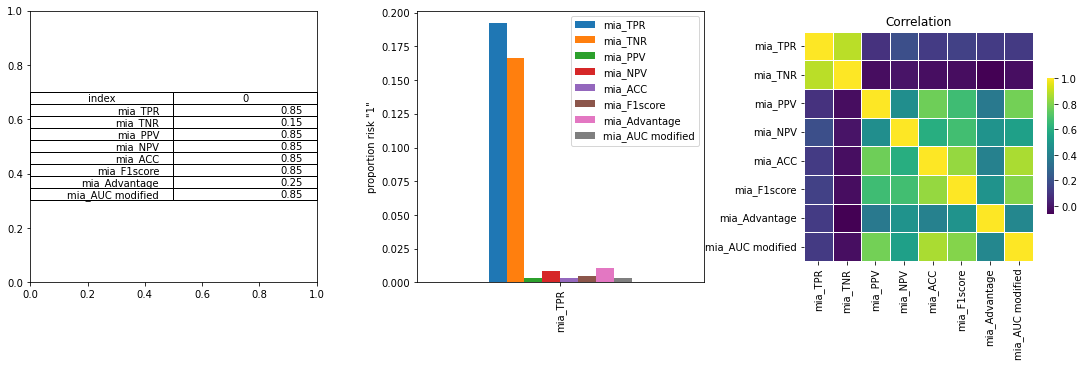

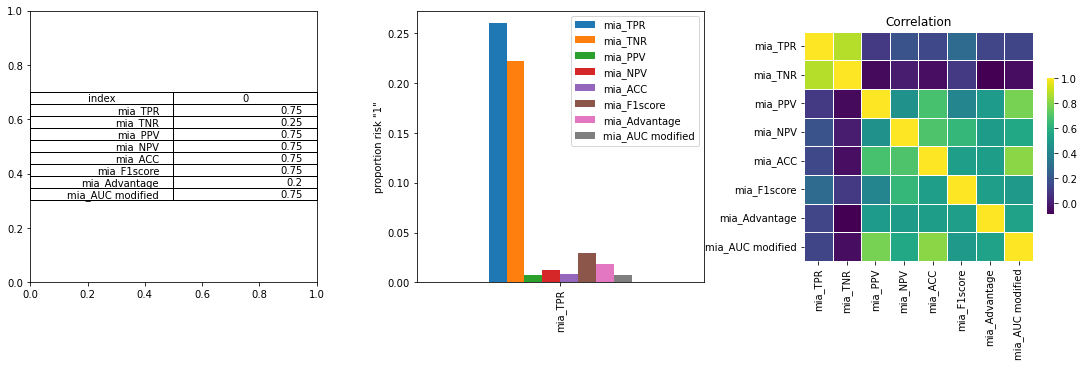

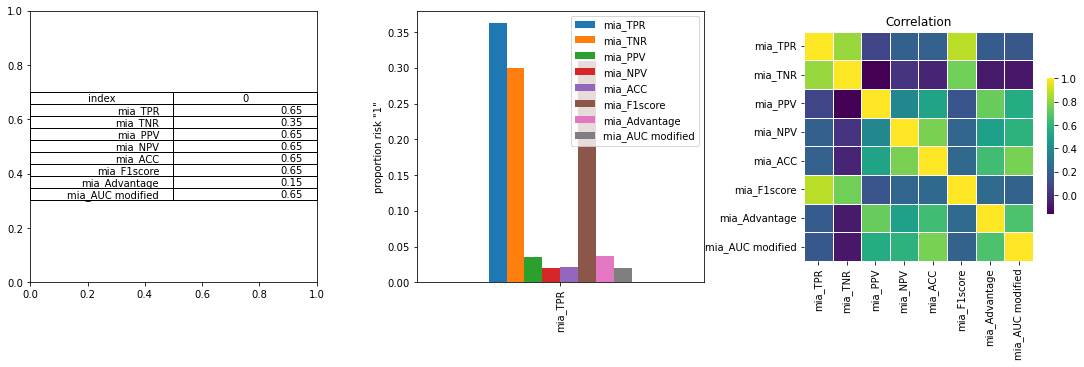

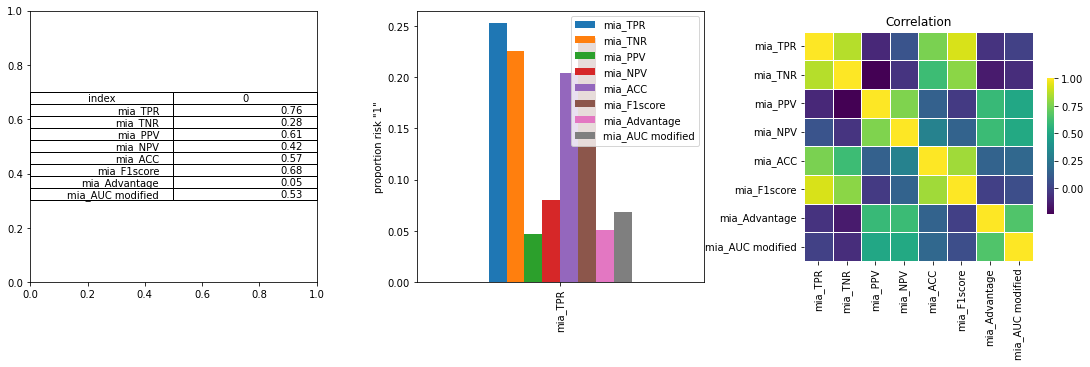

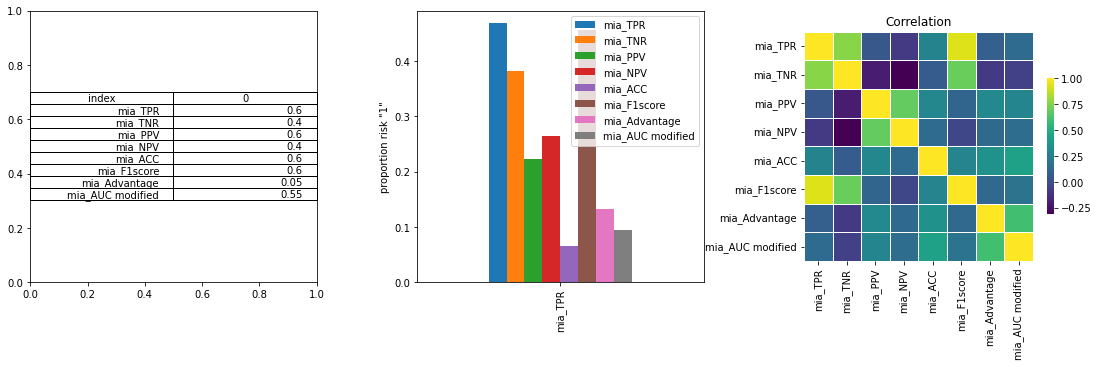

In [7]:
#Therefore one metric of each pair can be discarded, and the discarded ones are:
# FPR
# FNR
# FAR
print('start')
comb_metrics = [list(j) for x in [list(combinations(metrics,i)) for i in range(len(metrics),len(metrics)+1)] 
                for j in x]
print('len comb  metrics', len(comb_metrics))
#total = len(results_df)
print(total, 'total')
d = {}
n=0

lims = [
    {'mia_TPR' : 0.85,
    'mia_TNR' : 0.15,
    'mia_PPV' : 0.85,
    'mia_NPV' : 0.85,
    'mia_ACC' : 0.85,
    'mia_F1score' : 0.85,
    'mia_Advantage' : 0.25,
    'mia_AUC modified' : 0.85},
    {'mia_TPR' : 0.75,
    'mia_TNR' : 0.25,
    'mia_PPV' : 0.75,
    'mia_NPV' : 0.75,
    'mia_ACC' : 0.75,
    'mia_F1score' : 0.75,
    'mia_Advantage' : 0.2,
    'mia_AUC modified' : 0.75},
    {'mia_TPR' : 0.65,
    'mia_TNR' : 0.35,
    'mia_PPV' : 0.65,
    'mia_NPV' : 0.65,
    'mia_ACC' : 0.65,
    'mia_F1score' : 0.65,
    'mia_Advantage' : 0.15,
    'mia_AUC modified' : 0.65}
]

m = {}
for metric in metrics:
    if metric in inverse_metrics:
        q75 = results_df[metric].quantile(0.25)
    else:
        q75 = results_df[metric].quantile(0.75)
    m[metric] = round(q75,2)
lims.append(m)

#limits['q75 adjusted'] = {}
lims.append({'mia_TPR':0.60, 'mia_TNR':0.40, 'mia_PPV':0.60, 'mia_NPV':0.40, 
             'mia_ACC':0.60, 'mia_F1score':0.60, 'mia_Advantage':0.05, 'mia_AUC modified':0.55})


with PdfPages('plots_risk_binarised_metrics.pdf') as pdf_pages:
    i = 0
    for j, lim in enumerate(lims):
        binary = pd.DataFrame()
        bi = pd.DataFrame()
        for metric,v in lim.items():
            inv = False
            if metric in inverse_metrics: inv = True
            binary[metric] = binarise(binary_metrics[metric], v, inv)
            bi[metric] = binary[binary[metric]==1].sum()/total
                #binary[metric] = binary[metric]/total
            #binary['target_classifier'] = results_df['target_classifier']
            #binary['dataset'] = results_df['dataset']
            #binary['scenario'] = results_df['scenario']
                #binary[metric+"_proportion"] = binary[metric]/total
                #sns.countplot(x=metric+"_proportion", #hue="dataset", 
                #              hue="target_classifier", data=binary[binary[metric]==1])
            #for metric in metrics:
        print('bi',bi)
        # Compute a correlation matrix and convert to long-form
        #corr_mat = binary.corr().stack().reset_index(name="correlation")

        # Draw each cell as a scatter point with varying size and color
        #g = sns.relplot(
        #    data=corr_mat,
        #    x="level_0", y="level_1", hue="correlation", size="correlation",
        #    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
        #    height=6, sizes=(5, 25), size_norm=(-.1, 1.0),
        #)
        # Tweak the figure to finalize
        #g.set(xlabel="", ylabel="", aspect="equal")
        #g.despine(left=True, bottom=True)
        #g.ax.margins(.02)
        #for label in g.ax.get_xticklabels():
        #    label.set_rotation(90)
        #for artist in g.legend.legendHandles:
        #    artist.set_edgecolor(".7")
        #plt.show()
        fig = plt.figure(i)
        fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize= (19,5))
        #print(df.scenario.unique())
        #clfs = list(df.target_classifier.unique())
        limits = pd.DataFrame.from_dict(lim, orient='index').reset_index()
        print(limits)
        #ax3 = sns.kdeplot(data=binary)

        #ax2 = sns.barplot(data=bi)#bi.plot(ax=ax2, kind='bar')
        #ax.title('number of 1')
        ax1.table(cellText=limits.values, colLabels=limits.columns, 
                         colWidths=[.5,.5], loc='center')
        #ax1.despine()
        bi.plot(kind='bar', ax=ax2)
        ax2.set_ylabel('proportion risk "1"')
        #binary.plot(kind='kde',ax=ax3)
        plt.subplots_adjust(wspace=0.35, hspace=0.1)
        plt.xticks(rotation=90)
        ax3 = sns.heatmap(binary.corr(), cmap='viridis',#mask=mask, #cmap=cmap, 
                    #vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
        ax3.set_title('Correlation')
        pdf_pages.savefig(fig)
        i+=1
        #plt.show()
        #plt.close()

In [ ]:
print('start')
comb_metrics = [list(j) for x in [list(combinations(metrics,i)) for i in range(3,4)] for j in x]
print('len comb  metrics', len(comb_metrics))
#total = len(results_df)
print(total, 'total')
d = {}
n=0
above = [i/100 for i in range(40,81,10)]
under = [i/100 for i in range(10,61,10)]
auc = [i/100 for i in range(51,81,5)]
far = [i/100 for i in range(30,76,10)]
advantage_limits = [i/100 for i in range(1,16,1)]
for j,c in enumerate(comb_metrics):
    print(j,c)
    all_list = [advantage_limits if metric=="mia_Advantage" 
                else auc if metric=="mia_AUC modified"
                #else far if metric=="mia_FAR"
                else above if metric not in inverse_metrics 
                else under for metric in c]
    #for i,p in enumerate(list(permutations(l,len(c)))):
    for i,p in enumerate(list(product(*all_list))):
        lim = dict(zip(c, p))
        #print('limit name',lim,'i',i)
        binary = pd.DataFrame()
        for metric,v in lim.items():
            inv = False
            if metric in inverse_metrics: inv = True
            binary[metric] = binarise(binary_metrics[metric], v, inv)
        tmp_0 = binary.copy()
        tmp_1 = binary.copy()
        #t = []
        for x in range(len(c)):
            #t.append(len(binary[binary[c[x]]==1]))
            tmp_0 = tmp_0[tmp_0[c[x]]==0]
            tmp_1 = tmp_1[tmp_1[c[x]]==1]
        perc =  ((len(tmp_0)+len(tmp_1))/total)*100
        if perc>=90.0:
            d[n] = {}
            d[n] = lim
            #d[n]['number bad'] = t
            #d[n]['only currently bad'] = len(tmp)/max(t)*100
            #d[n]['n'] = len(tmp)
            d[n]['agreed 0'] = len(tmp_0)
            d[n]['agrred 1'] = len(tmp_1)
            d[n]['Percentage agreement'] = perc
            #print(d[n], total)
            n+=1
            #print(d[n])
    print(len(d), 'len d')
    all_list = []

In [ ]:
print('start')
comb_metrics = [list(j) for x in [list(combinations(metrics,i)) for i in range(4,5)] for j in x]
print('len comb  metrics', len(comb_metrics))
#total = len(results_df)
print(total, 'total')
#d = {}
#n=0
above = [i/100 for i in range(40,81,10)]
under = [i/100 for i in range(10,61,10)]
auc = [i/100 for i in range(51,81,5)]
far = [i/100 for i in range(30,76,10)]
advantage_limits = [i/100 for i in range(1,16,1)]
for j,c in enumerate(comb_metrics[::-1]):
    print(j,c)
    all_list = [advantage_limits if metric=="mia_Advantage" 
                else auc if metric=="mia_AUC modified"
                #else far if metric=="mia_FAR"
                else above if metric not in inverse_metrics 
                else under for metric in c]
    #for i,p in enumerate(list(permutations(l,len(c)))):
    for i,p in enumerate(list(product(*all_list))):
        lim = dict(zip(c, p))
        #print('limit name',lim,'i',i)
        binary = pd.DataFrame()
        for metric,v in lim.items():
            inv = False
            if metric in inverse_metrics: inv = True
            binary[metric] = binarise(binary_metrics[metric], v, inv)
        tmp_0 = binary.copy()
        tmp_1 = binary.copy()
        #t = []
        for x in range(len(c)):
            #t.append(len(binary[binary[c[x]]==1]))
            tmp_0 = tmp_0[tmp_0[c[x]]==0]
            tmp_1 = tmp_1[tmp_1[c[x]]==1]
        perc =  ((len(tmp_0)+len(tmp_1))/total)*100
        if perc>=90.0:
            d[n] = {}
            d[n] = lim
            #d[n]['number bad'] = t
            #d[n]['only currently bad'] = len(tmp)/max(t)*100
            #d[n]['n'] = len(tmp)
            d[n]['agreed 0'] = len(tmp_0)
            d[n]['agrred 1'] = len(tmp_1)
            d[n]['Percentage agreement'] = perc
            #print(d[n], total)
            n+=1
            #print(d[n])
    print(len(d), 'len d')
    all_list = []

In [ ]:
pd.DataFrame.from_dict(d, orient='index')